## 230 - Plotting Sustained and Gusting Winds

[Youtube](https://www.youtube.com/watch?v=GUuwVGQerNI)

In [1]:
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
from metpy.units import units
%matplotlib inline

In [2]:
x, y = np.meshgrid(np.arange(4), np.arange(3))

In [3]:
x

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [4]:
y

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2]])

In [5]:
wspd = np.array([[0, 5, 8, 10],[0, 5, 8, 10], [0, 5, 8, 10]]) * units.knots
wgust = np.array([[0, 5, 8, 10],[5, 10, 13, 15], [10, 15, 18, 20]]) * units.knots
wdir = np.ones_like(wspd) * 315 * units.degrees

In [6]:
u, v = mpcalc.wind_components(wspd, wdir)
ug, vg = mpcalc.wind_components(wgust, wdir)

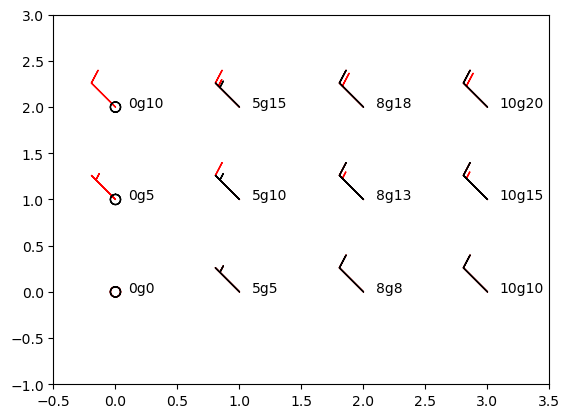

In [7]:
fig, ax = plt.subplots()
ax.barbs(x, y, u, v, zorder = 5)
ax.barbs(x, y, ug, vg, color = 'red', zorder = 4)
ax.set_ylim(-1, 3)
ax.set_xlim(-0.5, 3.5)

for xp, yp, ws, wg in zip(x.ravel(), y.ravel(), wspd.ravel(), wgust.ravel()):
    ax.text(xp + 0.1, yp, f'{ws.m}g{wg.m}')